In [1]:
pip install pydicom

     |████████████████████████████████| 2.0 MB 29.3 MB/s 


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from itertools import chain
import pydicom
from skimage import io

In [10]:
## load data
data = pd.read_csv('sample_labels.csv')
data.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
3119,00015386_000.png,Atelectasis|Effusion,0,15386,058Y,F,PA,2646,2797,0.143,0.143
4754,00024749_000.png,Pneumothorax,0,24749,040Y,M,PA,2992,2991,0.143,0.143
1206,00006370_000.png,No Finding,0,6370,085Y,F,AP,2048,2500,0.171,0.171


In [11]:
## Load  data for pixel level assessments
sample_data = pd.read_csv('sample_labels.csv')
sample_data.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
1150,00006039_001.png,No Finding,1,6039,058Y,M,AP,2500,2048,0.168,0.168
3926,00019373_025.png,Mass,25,19373,040Y,M,PA,2992,2991,0.143,0.143
1174,00006237_018.png,No Finding,18,6237,057Y,F,AP,2500,2048,0.171,0.171


(array([3134.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2472.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

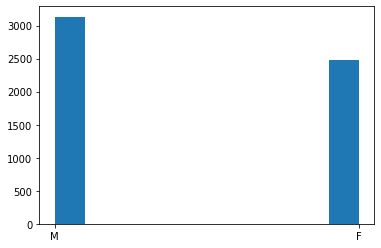

In [12]:
## Exploratory data analysis

# Patient Gender Distribution
plt.hist(data['Patient Gender'])

(array([889., 758., 846., 688., 760., 653., 412., 392., 177.,  31.]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <a list of 10 Patch objects>)

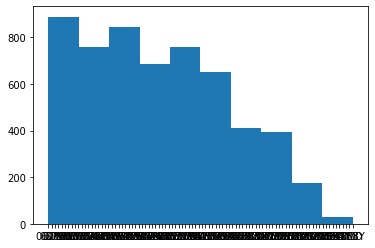

In [13]:
# Patient Age Distribution
plt.hist(data['Patient Age'])

(array([2213.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3393.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

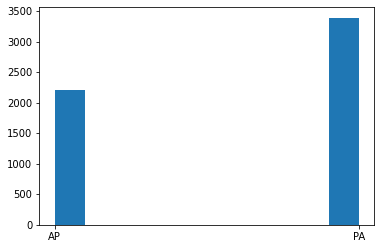

In [14]:
# View Position Distribution
plt.hist(data['View Position'])

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


[Text(0, 0.5, 'Images with Labels')]

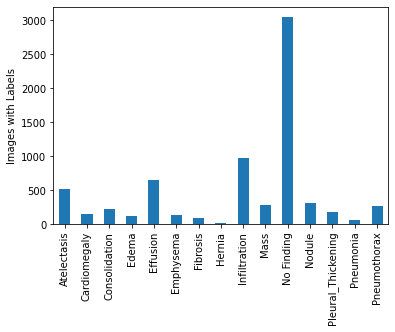

In [21]:
# Finding Labels Distribution
all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for labels in all_labels:
    if len(labels)>1: 
        data[labels] = data['Finding Labels'].map(lambda finding: 1.0 if labels in finding else 0)
data.sample(3)

plots = data[all_labels]

xa = plots.sum().plot(kind='bar')
xa.set(ylabel = 'Images with Labels')

In [22]:
# Number of pneumonia cases
pneu_cases = plots['Pneumonia'].sum()
print(f'Number of pneumonia cases: {pneu_cases}')

Number of pneumonia cases: 62.0


In [23]:
# Number of non-pneumonia cases
non_pneu_cases = len(plots) - pneu_cases
print(f'Number of non-pneumonia cases: {non_pneu_cases}')

Number of non-pneumonia cases: 5544.0


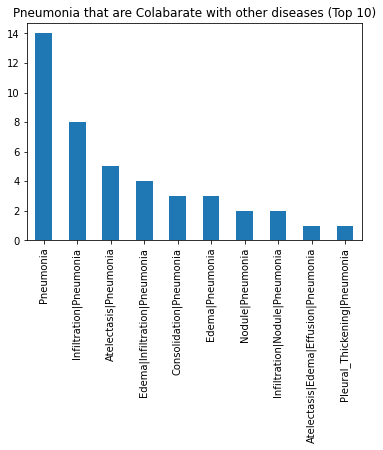

In [24]:
#  other diseases that are colabarate with pneumonia
data[data.Pneumonia==1]['Finding Labels'].value_counts()[0:10].plot(kind='bar', title='Pneumonia that are Colabarate with other diseases (Top 10)')

In [25]:
# Number of disease per patient
num_diseases = []
for row in plots.iterrows():
    num_diseases.append(sum(row[1].values))
mySer = pd.Series(num_diseases)

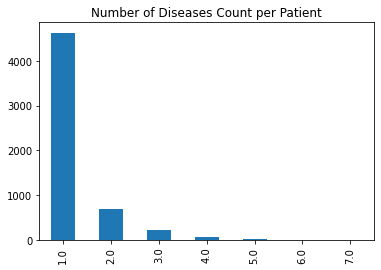

In [26]:
mySer.value_counts().plot(kind='bar',title='Number of Diseases Count per Patient')

#  plots just one of each  type

In [27]:
sample = pd.read_csv('sample_labels.csv')
sample_paths = {os.path.basename(y): y for y       
                     in glob(os.path.join('/data','images*', '*', 
                     '*.png'))}
sample['path'] = sample['Image Index'].map(sample_paths.get)

In [30]:
#new_data = pd.DataFrame(columns=df.columns)
new_data = sample
for label1 in all_labels:
    df = data.loc[data['Finding Labels']==label1].sample(1)
    new_data = new_data.append(df)
new_data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,00020900_002.png,No Finding,2,20900,411Y,M,AP,3056,2544,0.139,0.139,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2939,00014438_005.png,Nodule,5,14438,054Y,F,PA,2892,2948,0.143,0.143,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4530,00022600_001.png,Pleural_Thickening,1,22600,067Y,M,PA,2992,2991,0.143,0.143,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4459,00022192_032.png,Pneumonia,32,22192,073Y,M,PA,2992,2991,0.143,0.143,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
